In [1]:
import pandas as pd

train = pd.read_csv('train.csv')

train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

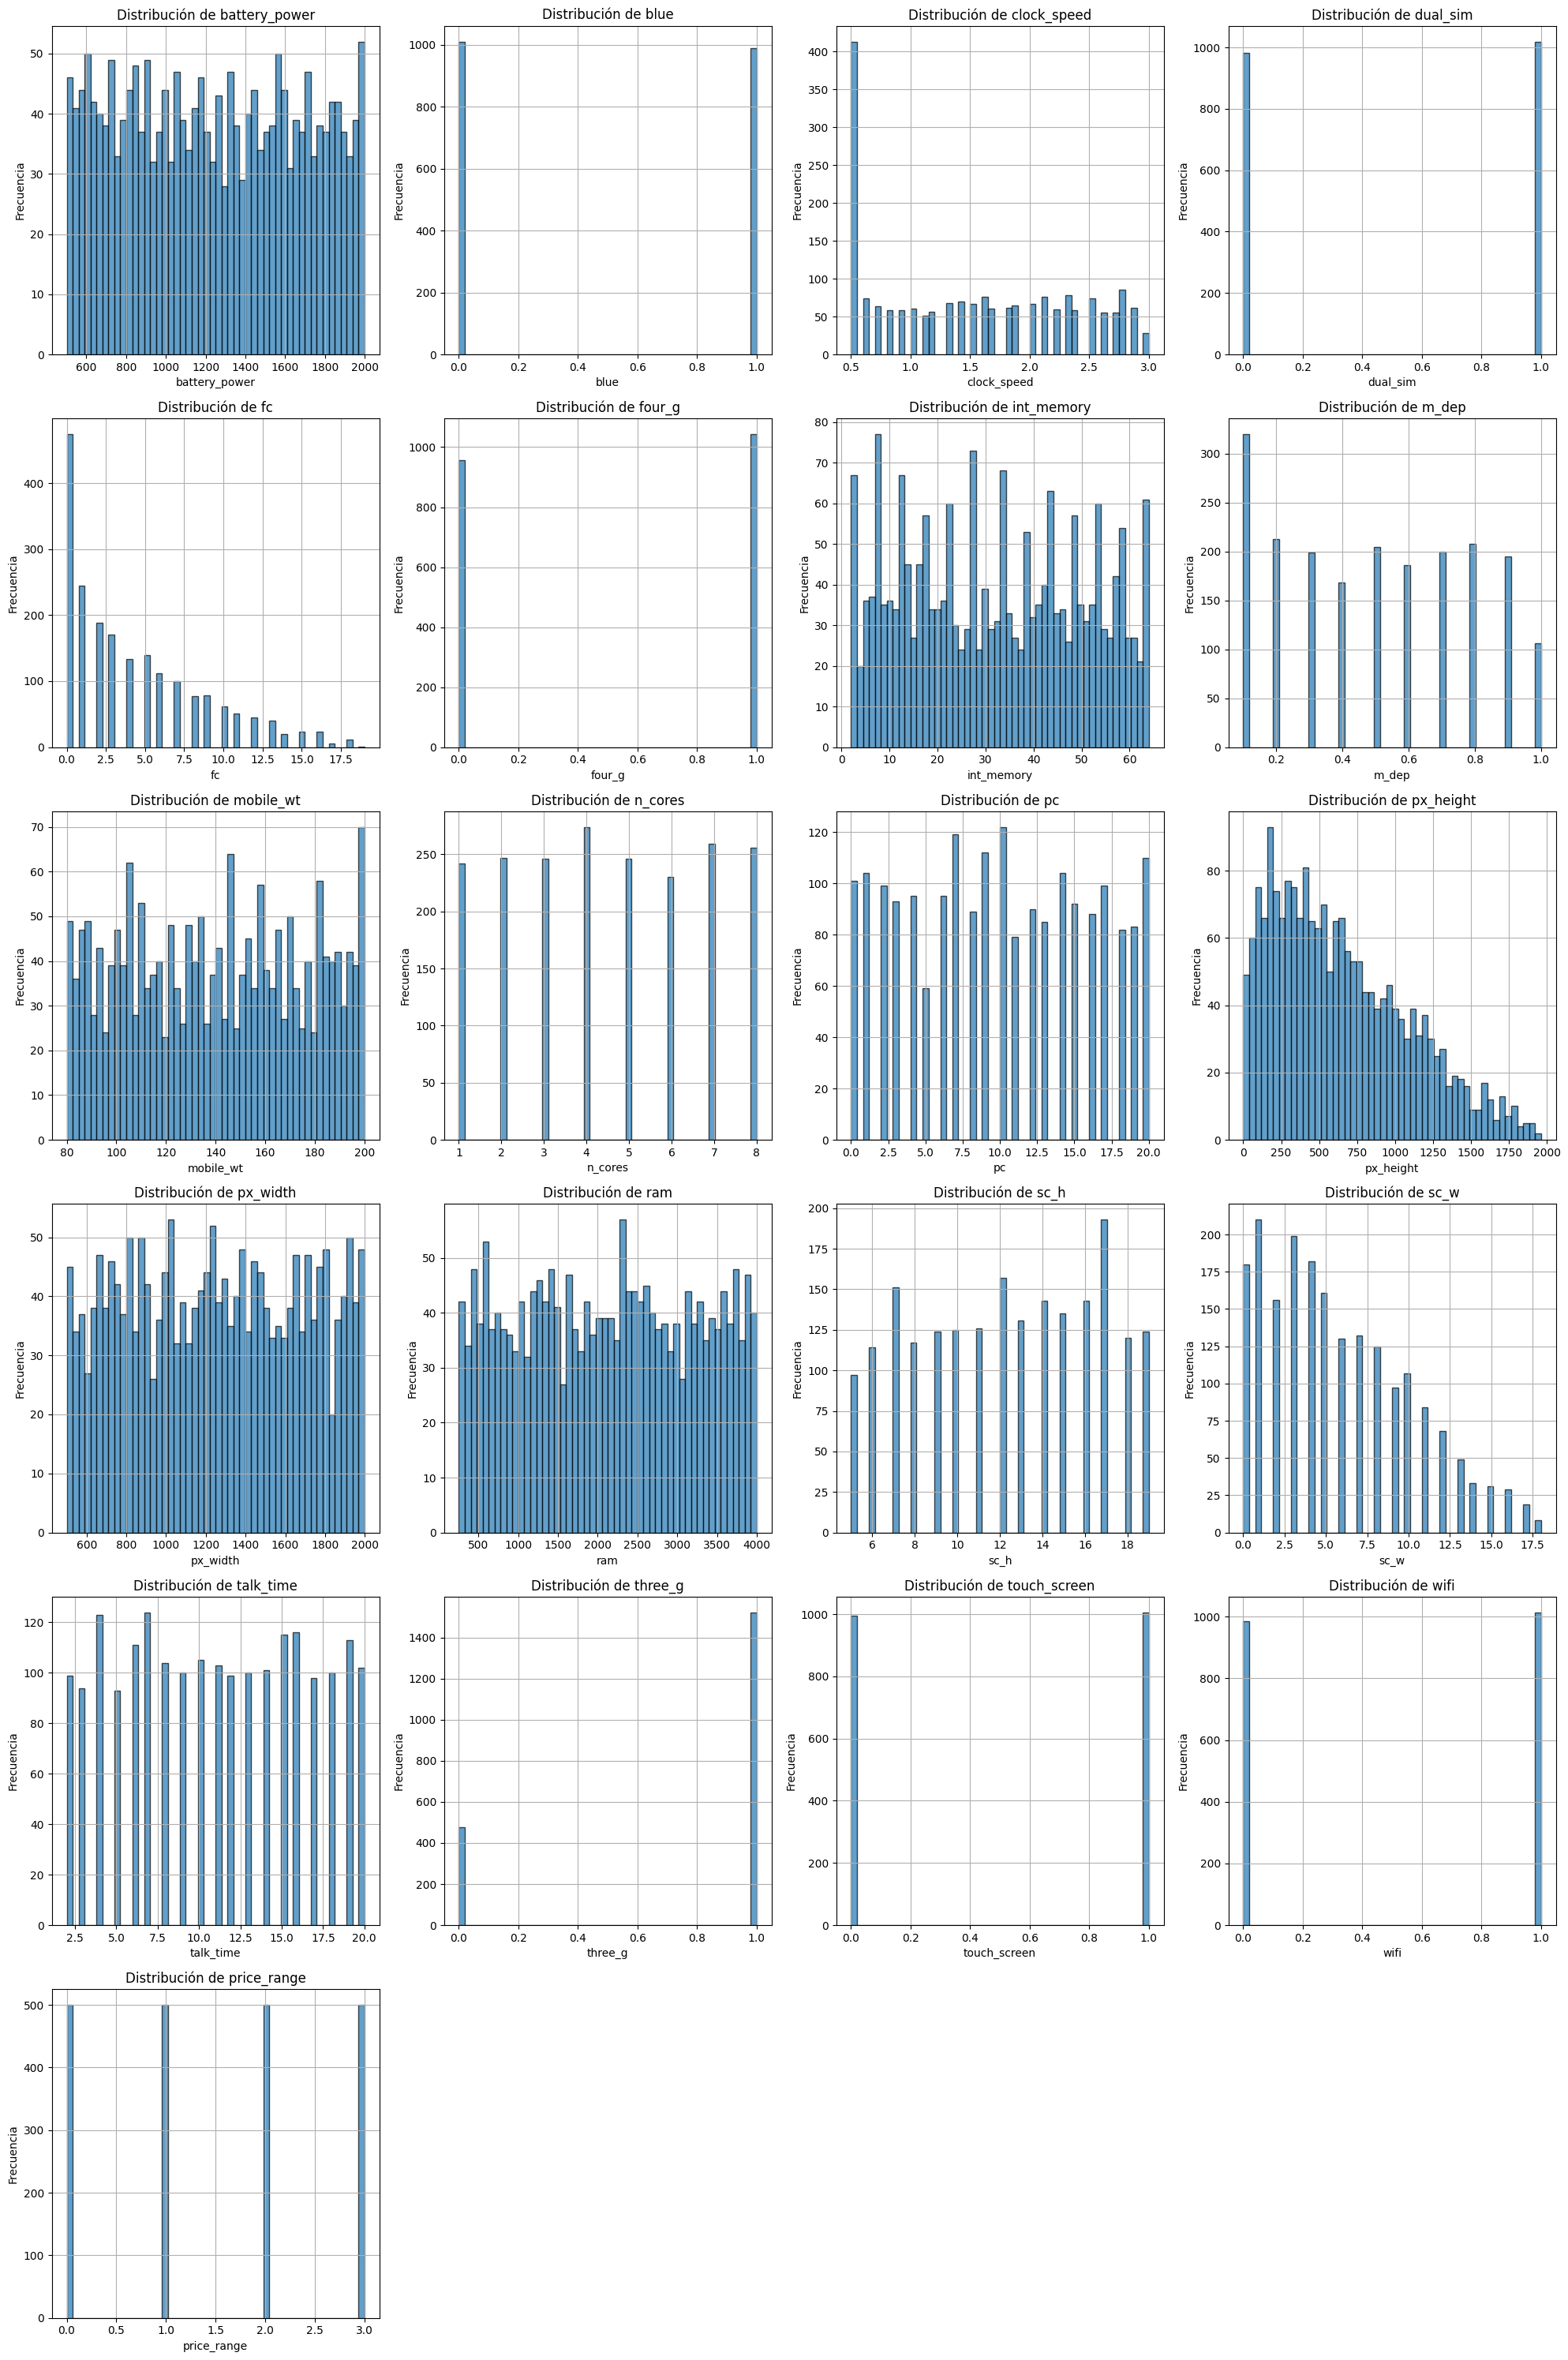

In [8]:
import matplotlib.pyplot as plt

# Configuración del diseño para histogramas
variables = train.columns  # Todas las variables en el dataset
num_vars = len(variables)
cols = 4  # Número de columnas
rows = (num_vars + cols - 1) // cols  # Calcular el número de filas necesarias

# Crear los subgráficos
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()  

# Generar histogramas para cada variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(train[var], bins=50, edgecolor='k', alpha=0.7)
    ax.set_title(f'Distribución de {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid()

# Ocultar los subgráficos vacíos si hay menos variables que subgráficos
for j in range(len(variables), len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# BAGGING

In [9]:
from sklearn.model_selection import train_test_split

# Dividir los datos en variables independientes (X) y dependiente (y)
X = train.drop('price_range', axis=1)  # Variables independientes
y = train['price_range']  # Variable dependiente

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

bag_knn = BaggingClassifier(estimator=KNeighborsClassifier(),
                           n_estimators= 500,
                           random_state= 42).fit(X_train, y_train)

bag_knn_predict = bag_knn.predict(X_test)
print('El Accuracy usando Bagging con KNN es de: {}'.format(accuracy_score(bag_knn_predict, y_test)))

El Accuracy usando Bagging con KNN es de: 0.95


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.95      0.93        91
           2       0.91      0.93      0.92        92
           3       0.99      0.94      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



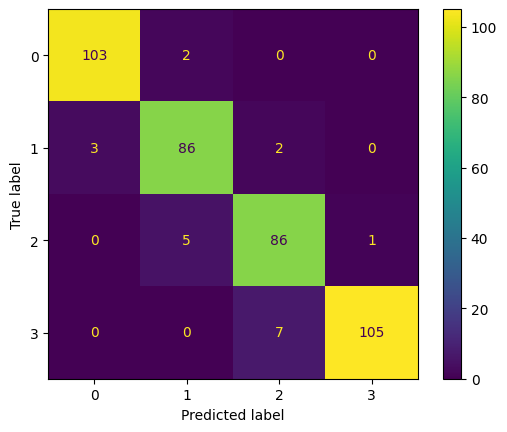

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, bag_knn_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, bag_knn_predict)).plot()


# BOOSTING

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, random_state= 42).fit(X_train, y_train)

gb_predict = gb.predict(X_test)
print('El Accuracy usando Boosting es de: {}'.format(accuracy_score(gb_predict, y_test)))

El Accuracy usando Boosting es de: 0.905


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.89      0.89      0.89        91
           2       0.82      0.87      0.85        92
           3       0.94      0.90      0.92       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400



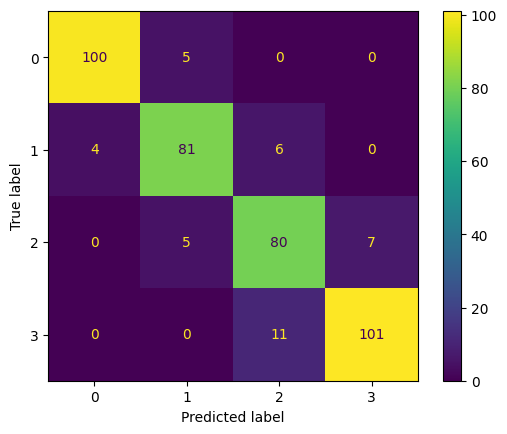

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print(classification_report(y_test, gb_predict))
ConfusionMatrixDisplay(confusion_matrix(y_test, gb_predict)).plot()


# STACKING

In [17]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# Definir los modelos base
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=300, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=15))
]
# Definir el modelo de stacking con un meta-modelo de regresión logística
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    passthrough=False
)
# Entrenar el modelo de stacking
stacking_model.fit(X_train, y_train)
# Predicciones
y_pred_stacking = stacking_model.predict(X_test)

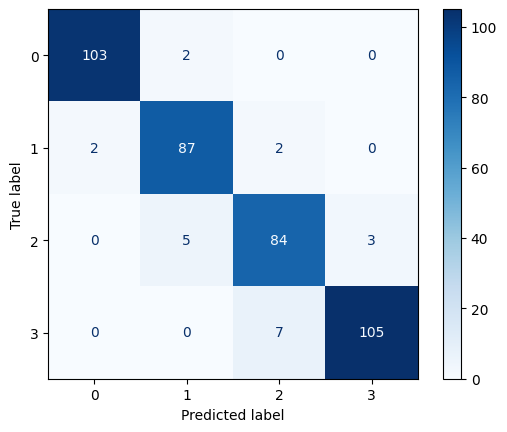

In [18]:

# Matriz de confusión
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_stacking)).plot(cmap="Blues")

In [19]:
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_stacking))


Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       105
           1       0.93      0.96      0.94        91
           2       0.90      0.91      0.91        92
           3       0.97      0.94      0.95       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



# GUARDAR EL MEJOR MODELO

In [20]:
import joblib
# Guardar el modelo entrenado
joblib.dump(stacking_model, "stacking_model.pkl")

['stacking_model.pkl']